#Credit Card Fraud Detection

##Dataset:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

###Problem statement:Develop a machine learning system using Decision Trees and SVM to detect fraudulent credit card transactions from highly imbalanced financial data.

> Add blockquote



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 1. Load Dataset
We use the Kaggle Credit Card Fraud Detection dataset. Upload creditcard.csv to Colab.

In [ ]:
# Load dataset
from google.colab import files
import pandas as pd

# Prompt user to upload
uploaded = files.upload()

# Get filename dynamically
filename = list(uploaded.keys())[0]

# Read the dataset
df = pd.read_csv(filename)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()

### 2. Dataset Description
Check dataset structure, column info, and class distribution.

In [ ]:
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['Class'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


### 3. Handle Missing Values
Check and handle missing values. This dataset has no missing values.

In [ ]:
print("Missing values per column:\n", df.isnull().sum().head())

Missing values per column:
 Time    0
V1      0
V2      0
V3      0
V4      0
dtype: int64


### 4. Feature Scaling
The Time and Amount features are not scaled, so we standardize them.

In [ ]:
data = df.copy()
scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data[['Time']])
data['Amount'] = scaler.fit_transform(data[['Amount']])
print(" Features 'Time' and 'Amount' scaled")
data.head()

 Features 'Time' and 'Amount' scaled


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


###  5. Train-Test Split
Split dataset into training (80%) and testing (20%) sets, stratified by class.

In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (227845, 30)
Test shape: (56962, 30)


### 6. Save Processed Data


In [ ]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
print(" Processed data saved as CSV files")

 Processed data saved as CSV files


###Summary
Dataset loaded successfully (284,807 rows, 31 columns)

No missing values found

Scaled Time and Amount

Train-test split (80/20) done with stratification

Saved preprocessed datasets for later modules


### Module 2: Exploratory Data Analysis (EDA)
In this module, we'll explore:
1. Class distribution (Fraud vs Non-Fraud)
2. Feature distributions (Histograms)
3. Comparison of `Amount` across classes (Boxplot)
4. Correlation analysis (Heatmap)
5. Key insights about dataset imbalance and patterns



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")


### 7. Fraud vs Non-Fraud Distribution

In [ ]:
#  Ensure your DataFrame 'df' is present
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Optional: Clean column names in case of unwanted spaces
df.columns = df.columns.str.strip()

#  Confirm the target column; rename if necessary
if "Class" not in df.columns:
    # Try common alternatives
    for alt in ["class", "Label", "Fraud", "target", "isFraud"]:
        if alt in df.columns:
            df = df.rename(columns={alt: "Class"})
            print(f"Renamed column '{alt}' to 'Class'")
            break
    else:
        raise ValueError("Couldn't find the target column 'Class' or its variants in dataset.")


Dataset Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


### 8. Plot Class Distribution

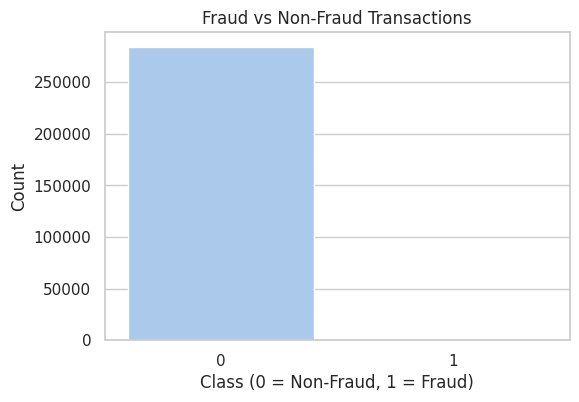


Class distribution (%):
Class
0    99.827
1     0.173
Name: proportion, dtype: float64



In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

fraud_perc = df["Class"].value_counts(normalize=True) * 100
print(f"\nClass distribution (%):\n{fraud_perc.round(3)}\n")

###9. Feature Histograms

<Figure size 1500x1500 with 0 Axes>

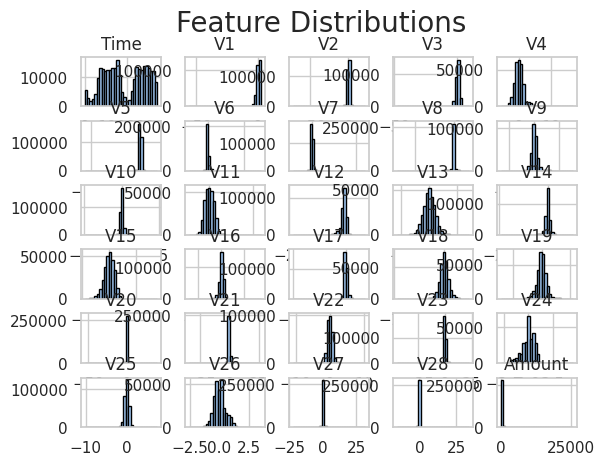

In [ ]:

plt.figure(figsize=(15, 15))
df.drop("Class", axis=1).hist(bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

 ### 10. Boxplot: Transaction Amount by Class

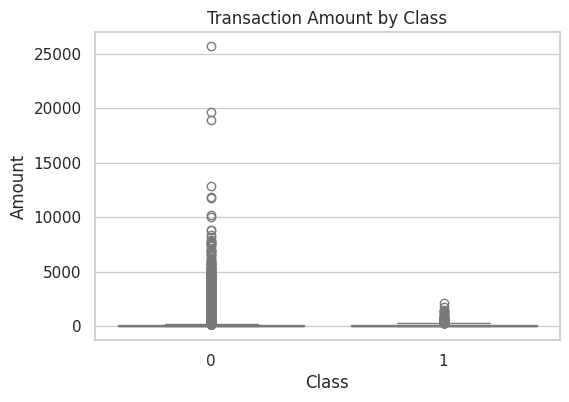

In [ ]:

if "Amount" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Class", y="Amount", data=df)
    plt.title("Transaction Amount by Class")
    plt.show()
else:
    print("Column 'Amount' not found in the dataset.")

### 11. Correlation Heatmap

## Insights


###1. Class Distribution

Non-Fraud: 99.83%

Fraud: 0.17%  (very imbalanced)

###2. Feature Distributions

Features V1–V28: PCA-transformed, many skewed.

Time: spans ~2 days.

Amount: mostly small transactions, few very large.

###3. Transaction Amount vs Class

Fraud exists across ranges, sometimes higher outliers.

Overlaps heavily with non-fraud → not a strong single predictor.

###4. Correlation Heatmap

PCA features are mostly uncorrelated.

Weak links with Amount & Time.

Fraud (Class) has little direct correlation with features.

###Takeaways

Extreme class imbalance → needs special handling (SMOTE, resampling, class weights).

No single feature separates fraud → must rely on ML models.

Visuals confirm complex patterns, not rule-based detection.

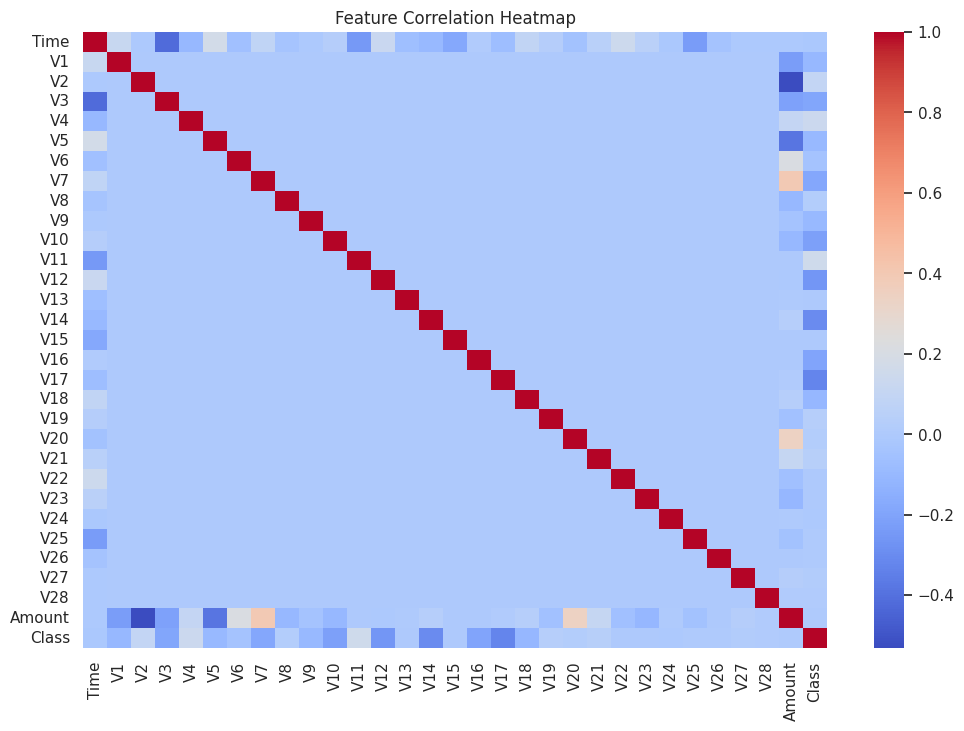

In [ ]:

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature Engineering**

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaled_data = df.copy()
std_scaler = StandardScaler()
scaled_data[['Time', 'Amount']] = std_scaler.fit_transform(df[['Time', 'Amount']])
print("StandardScaler applied: 'Time' and 'Amount' scaled to mean 0, std 1")

StandardScaler applied: 'Time' and 'Amount' scaled to mean 0, std 1


In [ ]:
mm_scaler = MinMaxScaler()
scaled_data_mm = df.copy()
scaled_data_mm[['Time', 'Amount']] = mm_scaler.fit_transform(df[['Time', 'Amount']])

print("MinMaxScaler applied: 'Time' and 'Amount' scaled to [0, 1]")

MinMaxScaler applied: 'Time' and 'Amount' scaled to [0, 1]


In [ ]:
print("\nStandard Scaled Features (first 5 rows):")
print(scaled_data[['Time', 'Amount']].head())

print("\nMinMax Scaled Features (first 5 rows):")
print(scaled_data_mm[['Time', 'Amount']].head())



Standard Scaled Features (first 5 rows):
       Time    Amount
0 -1.996583  0.244964
1 -1.996583 -0.342475
2 -1.996562  1.160686
3 -1.996562  0.140534
4 -1.996541 -0.073403

MinMax Scaled Features (first 5 rows):
       Time    Amount
0  0.000000  0.005824
1  0.000000  0.000105
2  0.000006  0.014739
3  0.000006  0.004807
4  0.000012  0.002724


**PCA**

In [ ]:
from sklearn.decomposition import PCA
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (284807, 30)
Reduced shape: (284807, 27)


In [ ]:
explained_var = pca.explained_variance_ratio_
print("\nExplained variance by each component:\n", explained_var)
print("\nTotal explained variance:", explained_var.sum())


Explained variance by each component:
 [0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333]

Total explained variance: 0.9547316791079885


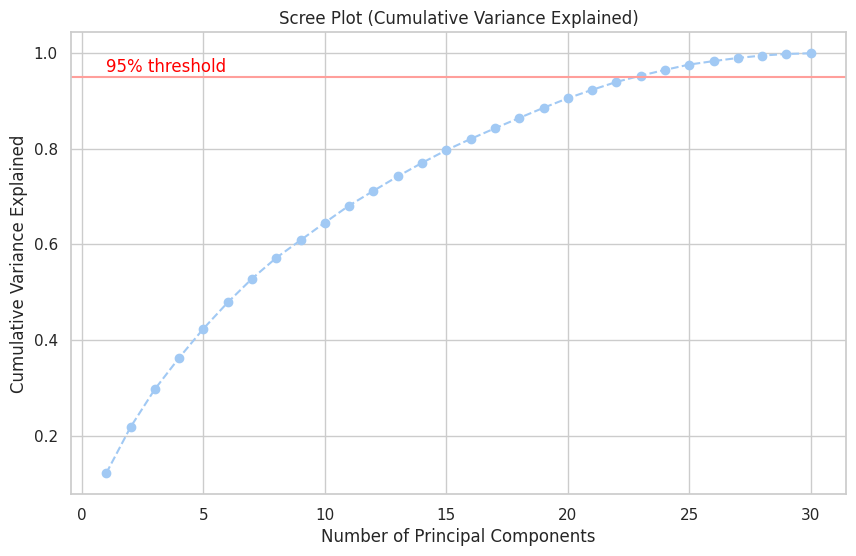

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% variance threshold
plt.text(1, 0.96, '95% threshold', color='red')

plt.title('Scree Plot (Cumulative Variance Explained)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

**Imbalance Handling**

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train-test split applied to scaled data.")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train-test split applied to scaled data.
Train shape: (227845, 30) (227845,)
Test shape: (56962, 30) (56962,)


In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nPCA applied.")
print("Train shape after PCA:", X_train_pca.shape)
print("Test shape after PCA:", X_test_pca.shape)
print("Total explained variance by PCA:", pca.explained_variance_ratio_.sum())


PCA applied.
Train shape after PCA: (227845, 27)
Test shape after PCA: (56962, 27)
Total explained variance by PCA: 0.955840594975811


In [ ]:
# Apply SMOTE to the PCA-transformed training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)

print("\nSMOTE applied to PCA-transformed training data.")
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


SMOTE applied to PCA-transformed training data.
Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


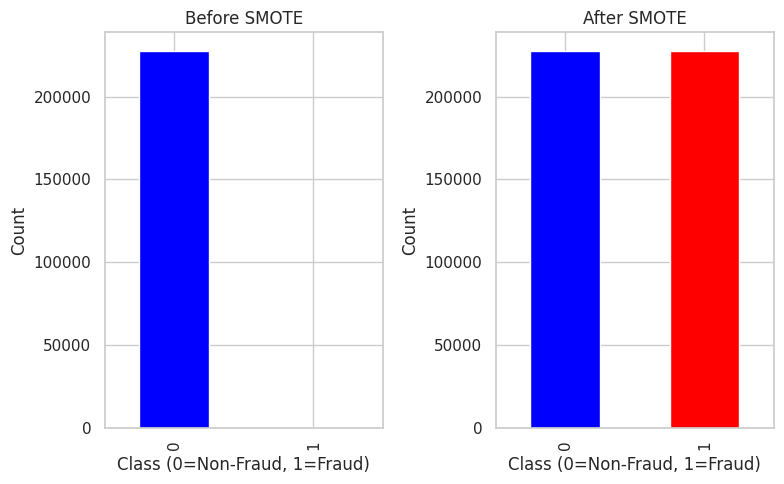

In [ ]:
before_counts = y_train.value_counts()
after_counts = y_train_res.value_counts()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
before_counts.plot(kind='bar', color=['blue','red'])
plt.title("Before SMOTE")
plt.xlabel("Class (0=Non-Fraud, 1=Fraud)")
plt.ylabel("Count")

plt.subplot(1,2,2)
after_counts.plot(kind='bar', color=['blue','red'])
plt.title("After SMOTE")
plt.xlabel("Class (0=Non-Fraud, 1=Fraud)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Before Undersampling:", y_train.value_counts())
print("After Undersampling:", y_train_res.value_counts())


Before Undersampling: Class
0    227451
1       394
Name: count, dtype: int64
After Undersampling: Class
0    394
1    394
Name: count, dtype: int64


OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Before Oversampling:", y_train.value_counts())
print("After Oversampling:", y_train_res.value_counts())


Before Oversampling: Class
0    227451
1       394
Name: count, dtype: int64
After Oversampling: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
print("Train shape before SMOTE:", X_train_pca.shape, y_train.shape)
print("Train shape after SMOTE:", X_train_res.shape, y_train_res.shape)
print("Test shape:", X_test_pca.shape, y_test.shape)

Train shape before SMOTE: (227845, 27) (227845,)
Train shape after SMOTE: (454902, 30) (454902,)
Test shape: (56962, 27) (56962,)


**Results**

* Feature Scaling:It calculates the mean and std of 'time' and 'Amount.After   feature scaling time and amount are standardize they won't vary in ranges.

*  PCA:Reducing the number of features,above code contain 95% of variance(captures 95% of data patterns).Reduce from 30 features to 27 features.

*  Data Imbalancing:Non-fraud is 227451 and Fraud samples are 394.Oversampling duplicates the non fraud samples in equal to fraud samples to .SMOTE is creating new synthetic fraud samples in equal to non-fraud samples.Undersampling randomly removes non-fraud samples until it equals to fraud samples

**Decision Tree Model, SVM Model**



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.utils import class_weight
import joblib
import time

# Optional: from imblearn.over_sampling import SMOTE  # if you want to use SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline  # if using imblearn pipeline



## 1) Configuration


In [ ]:

# === EDIT THESE FOR YOUR DATASET ===
# CSV_PATH = '/content/creditcard.csv'  # path in Colab (upload or mount Drive)
TARGET_COL = 'Class'                  # label column: 1 = fraud, 0 = non-fraud (typical Kaggle)
DROP_COLS = []                        # e.g., ['Time'] if you want to drop time column

RANDOM_STATE = 42

# Speed mode for large datasets: set to True to downsample before training heavy models (like SVM RBF)
FAST_MODE = False
FAST_FRACTION = 0.3  # keep 30% of data (stratified)


## 2) Load Data

In [ ]:
print("Shape:", df.shape)
print("Columns:", list(df.columns)[:10], "...")

if len(DROP_COLS) > 0:
    df = df.drop(columns=DROP_COLS)

assert TARGET_COL in df.columns, f"TARGET_COL '{TARGET_COL}' not found in columns!"

# Basic sanity check for imbalance
class_counts = df[TARGET_COL].value_counts().sort_index()
print("\nClass distribution:")
print(class_counts)
print("\nFraud rate: {:.4f}%".format(100.0 * class_counts.get(1,0) / class_counts.sum()))


Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'] ...

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud rate: 0.1727%


## 3)Stratified Sampling for Speed (if dataset is huge)

In [ ]:

def stratified_fraction(df, target_col, frac=0.3, random_state=42):
    # Sample the same fraction from each class
    parts = []
    for cls, group in df.groupby(target_col):
        parts.append(group.sample(frac=frac, random_state=random_state))
    return pd.concat(parts).sample(frac=1.0, random_state=random_state).reset_index(drop=True)

if FAST_MODE:
    print(f"FAST_MODE=True -> keeping {int(FAST_FRACTION*100)}% of the data (stratified).")
    df = stratified_fraction(df, TARGET_COL, frac=FAST_FRACTION, random_state=RANDOM_STATE)
    print("New shape after sampling:", df.shape)
    print(df[TARGET_COL].value_counts().sort_index())


## 4) Train/Test Split

In [ ]:
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Drop rows with NaN values before converting to int
df = df.dropna()
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train distribution:\n", y_train.value_counts(normalize=True).sort_index())

Train shape: (227845, 30)  Test shape: (56962, 30)
Train distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


## 5) Evaluation Helpers (metrics + plots)

In [ ]:

def evaluate_model(model, X_test, y_test, name="Model", feature_names=None, plot_curves=True):
    start = time.time()
    y_pred = model.predict(X_test)
    elapsed = time.time() - start

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n=== {name} Evaluation ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Inference time (predict on test set): {elapsed:.4f}s")

    # Confusion Matrix
    fig = plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} — Confusion Matrix")
    plt.show()

    # ROC & PR curves (if proba or decision function available)
    if plot_curves:
        try:
            # ROC
            fig = plt.figure(figsize=(5, 5))
            RocCurveDisplay.from_estimator(model, X_test, y_test)
            plt.title(f"{name} — ROC Curve")
            plt.show()
        except Exception as e:
            print("ROC curve not available:", e)

        try:
            # Precision-Recall
            fig = plt.figure(figsize=(5, 5))
            PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
            plt.title(f"{name} — Precision-Recall Curve")
            plt.show()
        except Exception as e:
            print("Precision-Recall curve not available:", e)

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }


## 6) Decision Tree — Baseline


=== Decision Tree (Baseline) Evaluation ===
Accuracy:  0.9989
Precision: 0.6762
Recall:    0.7245
F1 Score:  0.6995
Inference time (predict on test set): 0.0122s


<Figure size 500x500 with 0 Axes>

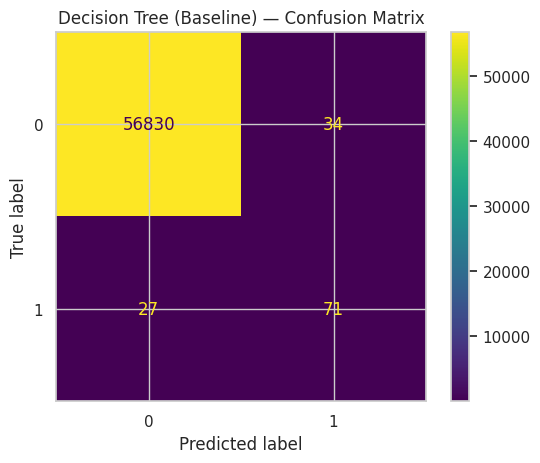

<Figure size 500x500 with 0 Axes>

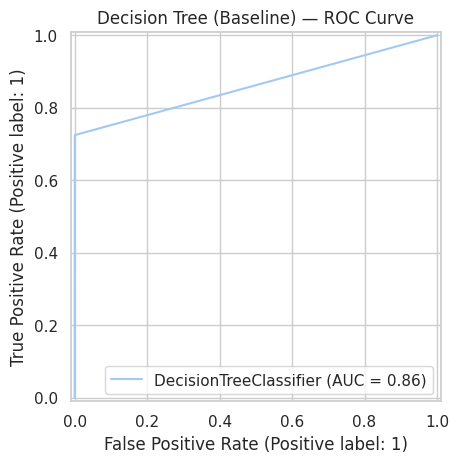

<Figure size 500x500 with 0 Axes>

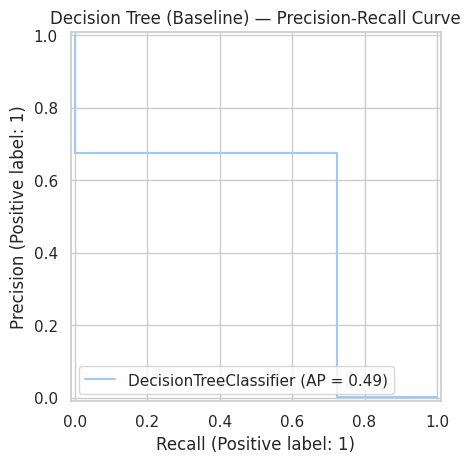

In [ ]:

dt_baseline = DecisionTreeClassifier(
    max_depth=None,
    criterion='gini',
    class_weight='balanced',  # helps with imbalance
    random_state=RANDOM_STATE
)
dt_baseline.fit(X_train, y_train)
dt_base_metrics = evaluate_model(dt_baseline, X_test, y_test, name="Decision Tree (Baseline)")


## 7) Decision Tree — Hyperparameter Tuning (GridSearchCV)

✅ Best DT params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Best DT CV F1: 0.7623540708959036

=== Decision Tree (Tuned) Evaluation ===
Accuracy:  0.9992
Precision: 0.7451
Recall:    0.7755
F1 Score:  0.7600
Inference time (predict on test set): 0.0075s


<Figure size 500x500 with 0 Axes>

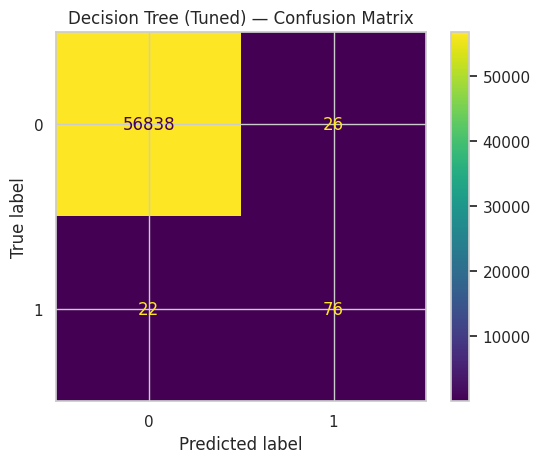

<Figure size 500x500 with 0 Axes>

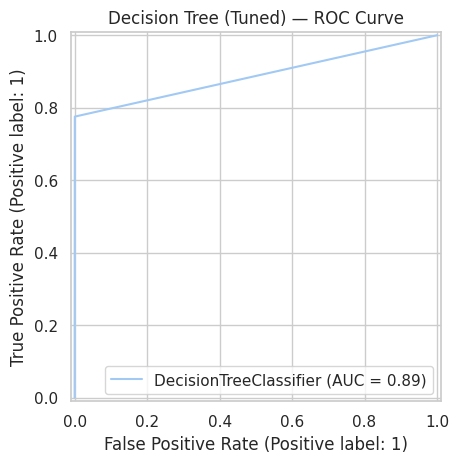

<Figure size 500x500 with 0 Axes>

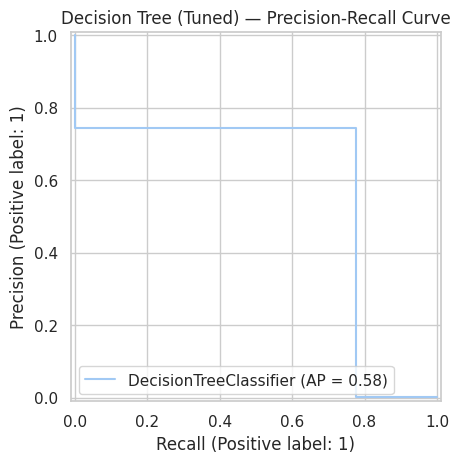

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Fix random state
RANDOM_STATE = 42

# Smaller grid to avoid long runtime
dt_param_grid = {
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "criterion": ["gini", "entropy"]
}

# Use fewer folds to reduce computation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

dt_gs = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid=dt_param_grid,
    scoring='f1',   # Optimize for F1 (important in imbalanced dataset)
    cv=cv,
    n_jobs=-1
)

dt_gs.fit(X_train, y_train)

print("✅ Best DT params:", dt_gs.best_params_)
print("✅ Best DT CV F1:", dt_gs.best_score_)

# Best model
dt_best = dt_gs.best_estimator_
dt_best_metrics = evaluate_model(dt_best, X_test, y_test, name="Decision Tree (Tuned)")


## 8) Decision Tree — Plot Tree & Feature Importance

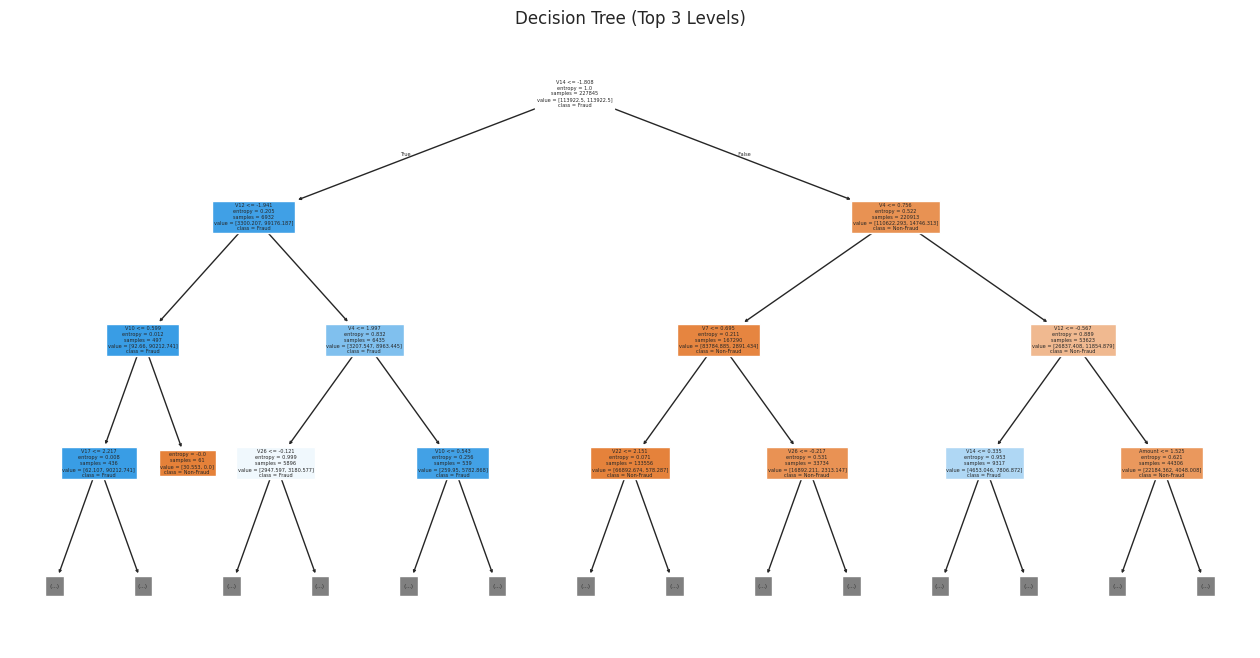

   feature  importance
14     V14    0.632045
4       V4    0.072287
12     V12    0.070715
26     V26    0.029017
7       V7    0.021424
10     V10    0.018695
29  Amount    0.018377
27     V27    0.016449
17     V17    0.013285
16     V16    0.012898
22     V22    0.011168
6       V6    0.011013
8       V8    0.010044
3       V3    0.009228
18     V18    0.007702


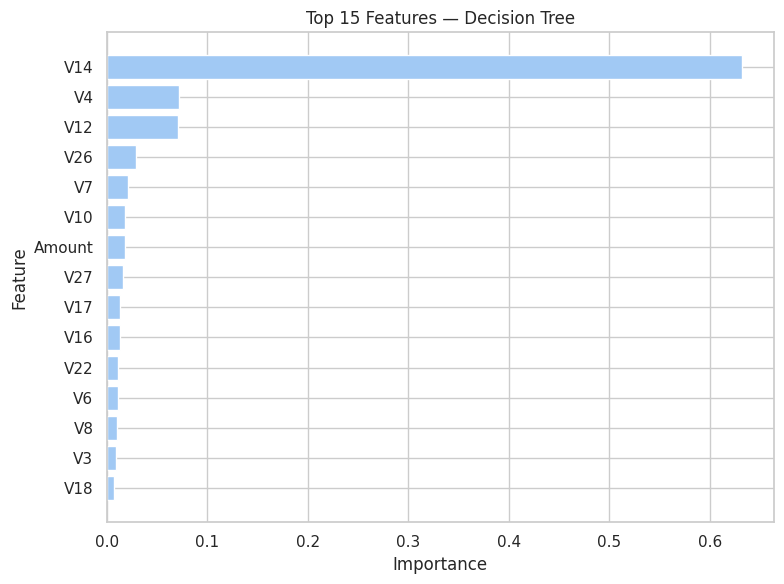

In [ ]:

# Plot a shallow version of the tree for readability
plt.figure(figsize=(16, 8))
plot_tree(
    dt_best,
    max_depth=3,              # show only top levels to keep the plot readable
    feature_names=X_train.columns.tolist(),
    class_names=['Non-Fraud', 'Fraud'],
    filled=True
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

# Feature importance
importances = getattr(dt_best, "feature_importances_", None)
if importances is not None:
    fi = pd.DataFrame({
        "feature": X_train.columns,
        "importance": importances
    }).sort_values("importance", ascending=False)

    print(fi.head(15))

    plt.figure(figsize=(8, 6))
    top_k = fi.head(15).iloc[::-1]  # reverse for horizontal bar
    plt.barh(top_k["feature"], top_k["importance"])
    plt.title("Top 15 Features — Decision Tree")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("No feature_importances_ attribute found on the decision tree model.")


##Save Model



In [ ]:

# Example: save the tuned SVM (or whichever you prefer)
BEST_MODEL = dt_best  # change to dt_best if that's better
MODEL_PATH = "best_fraud_model.joblib"

joblib.dump(BEST_MODEL, MODEL_PATH)
print(f"Saved best model to: {MODEL_PATH}")


NameError: name 'dt_best' is not defined

**Model Evaluation and Comparison**

In [ ]:
# ============================
# Task 1: Prepare a smaller dataset
# ============================

# Take a sample of 5000 rows for faster training
df_small = df.sample(n=5000, random_state=42)

# Separate features (X) and target (y)
X = df_small.drop("Class", axis=1)
y = df_small["Class"]

from sklearn.model_selection import train_test_split

# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Dataset prepared")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


NameError: name 'df' is not defined

In [ ]:
# ============================
# Task 2: Decision Tree Classifier
# ============================

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("✅ Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


In [ ]:
# ============================
# Task 3: SVM Classifier
# ============================

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Take a smaller balanced subset for training (2000 rows)
X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train, train_size=2000, stratify=y_train, random_state=42
)

# Train SVM with probability enabled
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train_small, y_train_small)

# Predictions on full test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("✅ SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))




In [ ]:
# ============================
# Task 4: Compare Models
# ============================

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

if accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_svm):
    print("✅ Decision Tree performed better")
else:
    print("✅ SVM performed better")


In [ ]:
# ============================
# Task 5: Confusion Matrix Visualization
# ============================

import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Greens")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# ============================
# Task 6: ROC Curve
# ============================

from sklearn.metrics import roc_curve, auc

# Probabilities for positive class (1)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# AUC scores
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
# ============================
# Task 7: Precision-Recall Curve
# ============================

from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-recall values
prec_dt, rec_dt, _ = precision_recall_curve(y_test, y_prob_dt)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)

# Average precision scores
ap_dt = average_precision_score(y_test, y_prob_dt)
ap_svm = average_precision_score(y_test, y_prob_svm)

# Plot PR curve
plt.figure(figsize=(7,5))
plt.plot(rec_dt, prec_dt, label=f"Decision Tree (AP = {ap_dt:.2f})")
plt.plot(rec_svm, prec_svm, label=f"SVM (AP = {ap_svm:.2f})")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


# **Deployment**

In [ ]:
# ==========================
# Deployment with Gradio
# ==========================
import gradio as gr
import joblib
import pandas as pd

# 1. Load the trained best model
MODEL_PATH = "best_fraud_model.joblib"
model = joblib.load(MODEL_PATH)

# 2. Define prediction function
def predict_fraud(time, amount, *features):
    """
    Predict fraud from a single transaction input.
    Args:
      time: standardized time value
      amount: standardized transaction amount
      features: PCA/other features V1–V28
    Returns:
      Prediction + probability
    """
    input_data = [time, amount] + list(features)
    df = pd.DataFrame([input_data], columns=X_train.columns)  # reuse training feature order
    pred = model.predict(df)[0]
    proba = model.predict_proba(df)[0][1] if hasattr(model, "predict_proba") else None

    label = "Fraudulent Transaction 🚨" if pred == 1 else "Legit Transaction ✅"
    if proba is not None:
        return f"{label} (Fraud Probability: {proba:.3f})"
    else:
        return label

# 3. Build Gradio Interface
inputs = [gr.Number(label="Time (scaled)"),
          gr.Number(label="Amount (scaled)")] + \
         [gr.Number(label=f"V{i}") for i in range(1, 29)]  # V1–V28

interface = gr.Interface(
    fn=predict_fraud,
    inputs=inputs,
    outputs="text",
    title="💳 Credit Card Fraud Detection",
    description="Enter transaction details to check if it's fraud or not."
)

# 4. Launch app
interface.launch(share=True)   # share=True gives public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4a498c9fdb2d2547d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
